In [30]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

In [31]:
cifar_path = 'cs231n/datasets/cifar-10-batches-py'
x_train, y_train, x_test, y_test = load_CIFAR10(cifar_path)
x_train_origin = x_test #后面x_test会被格式化成一维数组,我们先保存一下.
y_train_origin = x_test #后面x_test会被格式化成一维数组,我们先保存一下.
x_test_origin = x_test #后面x_test会被格式化成一维数组,我们先保存一下.
y_test_origin = x_test #后面x_test会被格式化成一维数组,我们先保存一下.
print("training data:", x_train.shape)
print("training label:", y_train.shape)
print("testing data:", x_test.shape)
print("testing label:", y_test.shape)

training data: (50000, 32, 32, 3)
training label: (50000,)
testing data: (10000, 32, 32, 3)
testing label: (10000,)


In [32]:
## show train data topologies
## plot 5 labels with 6 pictures

data_class = ['plane', 'car', 'bird', 'cat', 'deer']
num_class = len(data_class)
for y, cls in enumerate(data_class):
    idx = np.flatnonzero(y_train==y) # 找到和y同值的坐标集合.
    #因为这个集合是很大的, 可以看到y_data是50000个label.我们不可能全部显示,只能显示部分.我们这里先显示5个.所以就从所有是y的label的集合中
    #random出5个,重新组成一个精简的集合.
    # np.random.choice 的param0是待被挑选的集合, param1是要挑出几个成员, param2是挑出的成员是否还放回之前的原集合中,false是不放回..
    idx = np.random.choice(idx, 5, replace=False)
    print("idx",idx)


## show train data topologies
## plot 10 labels with 10 pictures


idx [18861  2680 26783 11238  6170]
idx [41010 40076 41896 36509 32624]
idx [16041 36349 47710 49686 30767]
idx [49009 43598 19578  1556  5192]
idx [35797 27106 45263  3879 12368]


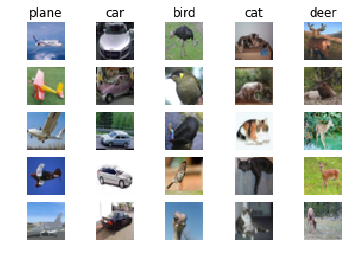

In [33]:
## show train data topologies
## plot 5 labels with 6 pictures

data_class = ['plane', 'car', 'bird', 'cat', 'deer']
num_class = len(data_class)
for y, cls in enumerate(data_class):
    idx = np.flatnonzero(y_train==y) # 找到和y同值的坐标集合.
    #因为这个集合是很大的, 可以看到y_data是50000个label.我们不可能全部显示,只能显示部分.我们这里先显示5个.所以就从所有是y的label的集合中
    #random出5个,重新组成一个精简的集合.
    # np.random.choice 的param0是待被挑选的集合, param1是要挑出几个成员, param2是挑出的成员是否还放回之前的原集合中,false是不放回..
    idx = np.random.choice(idx, 5, replace=False)
    #print("idx",idx)
    #想办法把上面的index集合从图上显示出来.
    #print("y",y)
    #print("cls",cls)
    for i, val_index in enumerate(idx):
        #print("i",i)
        #print("val_index",val_index)
        axi_x = i * num_class + 1+y
        #print("axi_x",axi_x)
        ##plt.subplot(2,1,1)， 表示创建一个2行，1列的图，p1为第一个子图
        plt.subplot(5, num_class, axi_x)
        plt.imshow(x_train[val_index].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


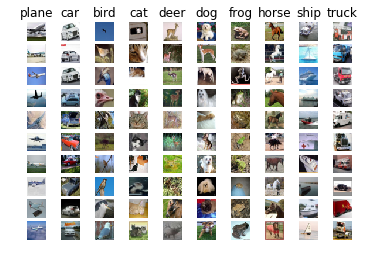

In [34]:
## show train data topologies
## plot 10 labels with 10 pictures
data_class = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_class = len(data_class)
sample_count = 10
for y, cls in enumerate(data_class):
    temp_index = np.flatnonzero(y_train==y)
    sample_index = np.random.choice(temp_index, sample_count, replace=False)
    for i, val_index in enumerate(sample_index):
        picture_location = i * sample_count + y +1
        plt.subplot(sample_count, num_class, picture_location)
        plt.imshow(x_train[val_index].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [39]:
## 对样本deci,得到一个小尺寸的图集
subsample_num_training = 5000
mask = range(subsample_num_training)
#print("mask", mask)
x_train = x_train[mask]
y_train = y_train[mask]
#print("x_train", x_train.shape)
subsample_num_testing = 500
mask = range(subsample_num_testing)
x_test = x_test[mask]
y_test = y_test[mask]
print("x_test", x_test.shape)
print("y_test", y_test.shape)

#把这些集合reshape成一行的
# np.reshape(set, (row,col)) col为-1时，是一行。
x_train = np.reshape(x_train, (x_train.shape[0],-1))
#y_train = np.reshape(y_train, (y_train.shape[0],-1))
#print("x_train.shape", x_train.shape)
#print("x_train", x_train)

x_test = np.reshape(x_test, (x_test.shape[0], -1))
#y_test = np.reshape(y_test, (y_test.shape[0], -1))

x_test (500, 3072)
y_test (500,)


In [40]:
# 加载knn分类器,以后我们会去实现它
from cs231n.classifiers import KNearestNeighbor
knn_classifier = KNearestNeighbor()
knn_classifier.train(x_train, y_train)

In [41]:
#计算每个测试集和训练集的距离:
#假设测试集有Nte个, 训练集有Ntr个.那么需要 Nte*Ntr个结果.它们可以组成一个数组,行数是测试集个数,
#列数是训练集个数,对应的(i,j)元素是第i个测试集和第j个训练集的距离.
dist = knn_classifier.compute_distances_two_loops(x_test)
print("dist", dist.shape)

dist (500, 5000)


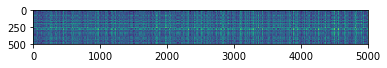

In [42]:
#实例化显示这个距离
#横坐标是训练集id,纵坐标是测试集id.里边的颜色深浅是对应的两者的距离值
plt.imshow(dist, interpolation='none')
plt.show()

dist.shape[0]= 500
dist[0] [ 3803.92350081  4210.59603857  5504.0544147  ...,  4007.64756434
  4203.28086142  4354.20256764]
np.argsort(dist[0])= [ 420 3684 4224 ..., 4375 2744 4601]
np.argsort(dist[0])[:1]= [420]
y_train [6 9 9 ..., 5 4 6]
y_train[np.argsort(dist[0])[:1]] = [4]
output =  [1 3 1 1 0 0 0 1]
closet_y =  [4]
closet_y_count =  [0 0 0 0 1]
closet_y_count_max =  4
gusse_result =  deer
ture_result  =  cat
x_train[0] =  [  59.   62.   63. ...,  123.   92.   72.]


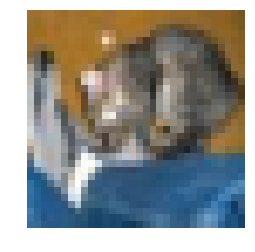

In [44]:
print("dist.shape[0]=", dist.shape[0]) #这是个500x50000的矩阵
print("dist[0]", dist[0]) # 这是个5000列的一维数组.每个成员是第0个测试图片和对应第j个训练集图片的距离.
print("np.argsort(dist[0])=",np.argsort(dist[0])) #对这个一维数组做一个从小到大的排序,这样我们可以很方便的找到一个最小距离,这个argsort返回的是从小到到的index.而非具体的值
print("np.argsort(dist[0])[:1]=",np.argsort(dist[0])[:1]) #比如找到最近的一个距离,返回其index
temp = np.argsort(dist[0])[:1]
print("y_train", y_train)
print("y_train[np.argsort(dist[0])[:1]] =", y_train[np.argsort(dist[0])[:1]]) #为什么会用最近的那个值 作为 y_train的的index呢?  答; 因为argsort返回的是index.
closet_y =  y_train[np.argsort(dist[0])[:1]]
#先列一下np.bincount函数的用法
x = np.array([0, 1, 1, 3, 2, 1, 7])
output = np.bincount(x)
print("output = ", output)
#output =  [1 3 1 1 0 0 0 1]
#x中最大值是7,所以我们要对0~7的值都统计各自出现的次数.
#output中第一个1,代表0出现的次数.
#第二个3代表1出现的次数
#以此类推.
closet_y_count = np.bincount(closet_y)
print("closet_y = ", closet_y)
print("closet_y_count = ", closet_y_count)

x = np.array([0, 0, 0, 0, 1])
closet_y_count_max = np.argmax(x) # 数组中最大的那个值对应的index返回回来.
print("closet_y_count_max = ", closet_y_count_max)
guess_result = data_class[closet_y_count_max]
print("gusse_result = ", guess_result)
print("ture_result  = ", data_class[y_test[0]])
print('x_train[0] = ', x_train[0])
plt.imshow(x_train_origin[0].astype('uint8'))

plt.axis('off')
plt.show()